# Feature Engineering & Feature Extraction

## Attaching Resources

### Importing Necessary Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
ep = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Energy_Production/main/Data%20Preprocessing%20%26%20EDA/EDA.csv')

ep

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production,log_temp,sqrt_temp,log_ev,sqrt_ev,log_ap,sqrt_ap,log_rh,sqrt_rh
0,9.59,38.56,1017.01,60.10,481.30,2.260721,3.096773,3.652215,6.209670,6.924622,31.890594,4.096010,7.752419
1,12.04,42.34,1019.72,94.67,465.36,2.488234,3.469870,3.745732,6.506919,6.927283,31.933055,4.550397,9.729851
2,13.87,45.08,1024.42,81.69,465.48,2.629728,3.724245,3.808439,6.714164,6.931882,32.006562,4.402932,9.038252
3,13.72,54.30,1017.89,79.08,467.05,2.618855,3.704052,3.994524,7.368853,6.925487,31.904388,4.370460,8.892694
4,15.14,49.64,1023.78,75.00,463.58,2.717340,3.891015,3.904797,7.045566,6.931257,31.996562,4.317488,8.660254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,457.32,2.839078,4.135215,3.905804,7.049113,6.913270,31.710093,4.404522,9.045441
9523,24.73,65.34,1015.42,52.80,446.92,3.208017,4.972927,4.179604,8.083316,6.923058,31.865655,3.966511,7.266361
9524,30.44,56.24,1005.19,56.24,429.34,3.415758,5.517246,4.029628,7.499333,6.912932,31.704732,4.029628,7.499333
9525,23.00,66.05,1020.61,80.29,421.57,3.135494,4.795832,4.190412,8.127115,6.928156,31.946987,4.385645,8.960469


## Splitting The Data Into Target and Independent set

In [49]:
x = ep.drop(columns = ['energy_production'])
y = ep['energy_production']

In [50]:
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity,log_temp,sqrt_temp,log_ev,sqrt_ev,log_ap,sqrt_ap,log_rh,sqrt_rh
0,9.59,38.56,1017.01,60.10,2.260721,3.096773,3.652215,6.209670,6.924622,31.890594,4.096010,7.752419
1,12.04,42.34,1019.72,94.67,2.488234,3.469870,3.745732,6.506919,6.927283,31.933055,4.550397,9.729851
2,13.87,45.08,1024.42,81.69,2.629728,3.724245,3.808439,6.714164,6.931882,32.006562,4.402932,9.038252
3,13.72,54.30,1017.89,79.08,2.618855,3.704052,3.994524,7.368853,6.925487,31.904388,4.370460,8.892694
4,15.14,49.64,1023.78,75.00,2.717340,3.891015,3.904797,7.045566,6.931257,31.996562,4.317488,8.660254
...,...,...,...,...,...,...,...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,2.839078,4.135215,3.905804,7.049113,6.913270,31.710093,4.404522,9.045441
9523,24.73,65.34,1015.42,52.80,3.208017,4.972927,4.179604,8.083316,6.923058,31.865655,3.966511,7.266361
9524,30.44,56.24,1005.19,56.24,3.415758,5.517246,4.029628,7.499333,6.912932,31.704732,4.029628,7.499333
9525,23.00,66.05,1020.61,80.29,3.135494,4.795832,4.190412,8.127115,6.928156,31.946987,4.385645,8.960469


## Performing Feature Selection

### Performing Mutual Info

In [5]:
mutual_scores = mutual_info_regression(x, y)
mutual_scores

array([1.16037647, 0.94690475, 0.27565839, 0.1163982 , 1.16052419,
       1.15757787, 0.95150143, 0.94837509, 0.27554807, 0.27527232,
       0.11462439, 0.11496969])

In [6]:
mutual_info_test = pd.DataFrame(mutual_scores).T
mutual_info_test.columns = x.columns

mutual_info_test

,temperature,exhaust_vacuum,amb_pressure,r_humidity,log_temp,sqrt_temp,log_ev,sqrt_ev,log_ap,sqrt_ap,log_rh,sqrt_rh
0,1.160376,0.946905,0.275658,0.116398,1.160524,1.157578,0.951501,0.948375,0.275548,0.275272,0.114624,0.11497


### Performing Tree Based method

In [7]:
dt = DecisionTreeRegressor()
dt.fit(x,y)

DecisionTreeRegressor()

In [17]:
dt.feature_importances_

0.08961573733231433

In [ ]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'MI' : mutual_scores,
    'IG' : dt.feature_importances_
})

imp_cols

In [ ]:
#imp_cols.to_csv('Feature Selection.csv', index=False)

### Compairing All Result

<Axes: xlabel='Features', ylabel='MI'>

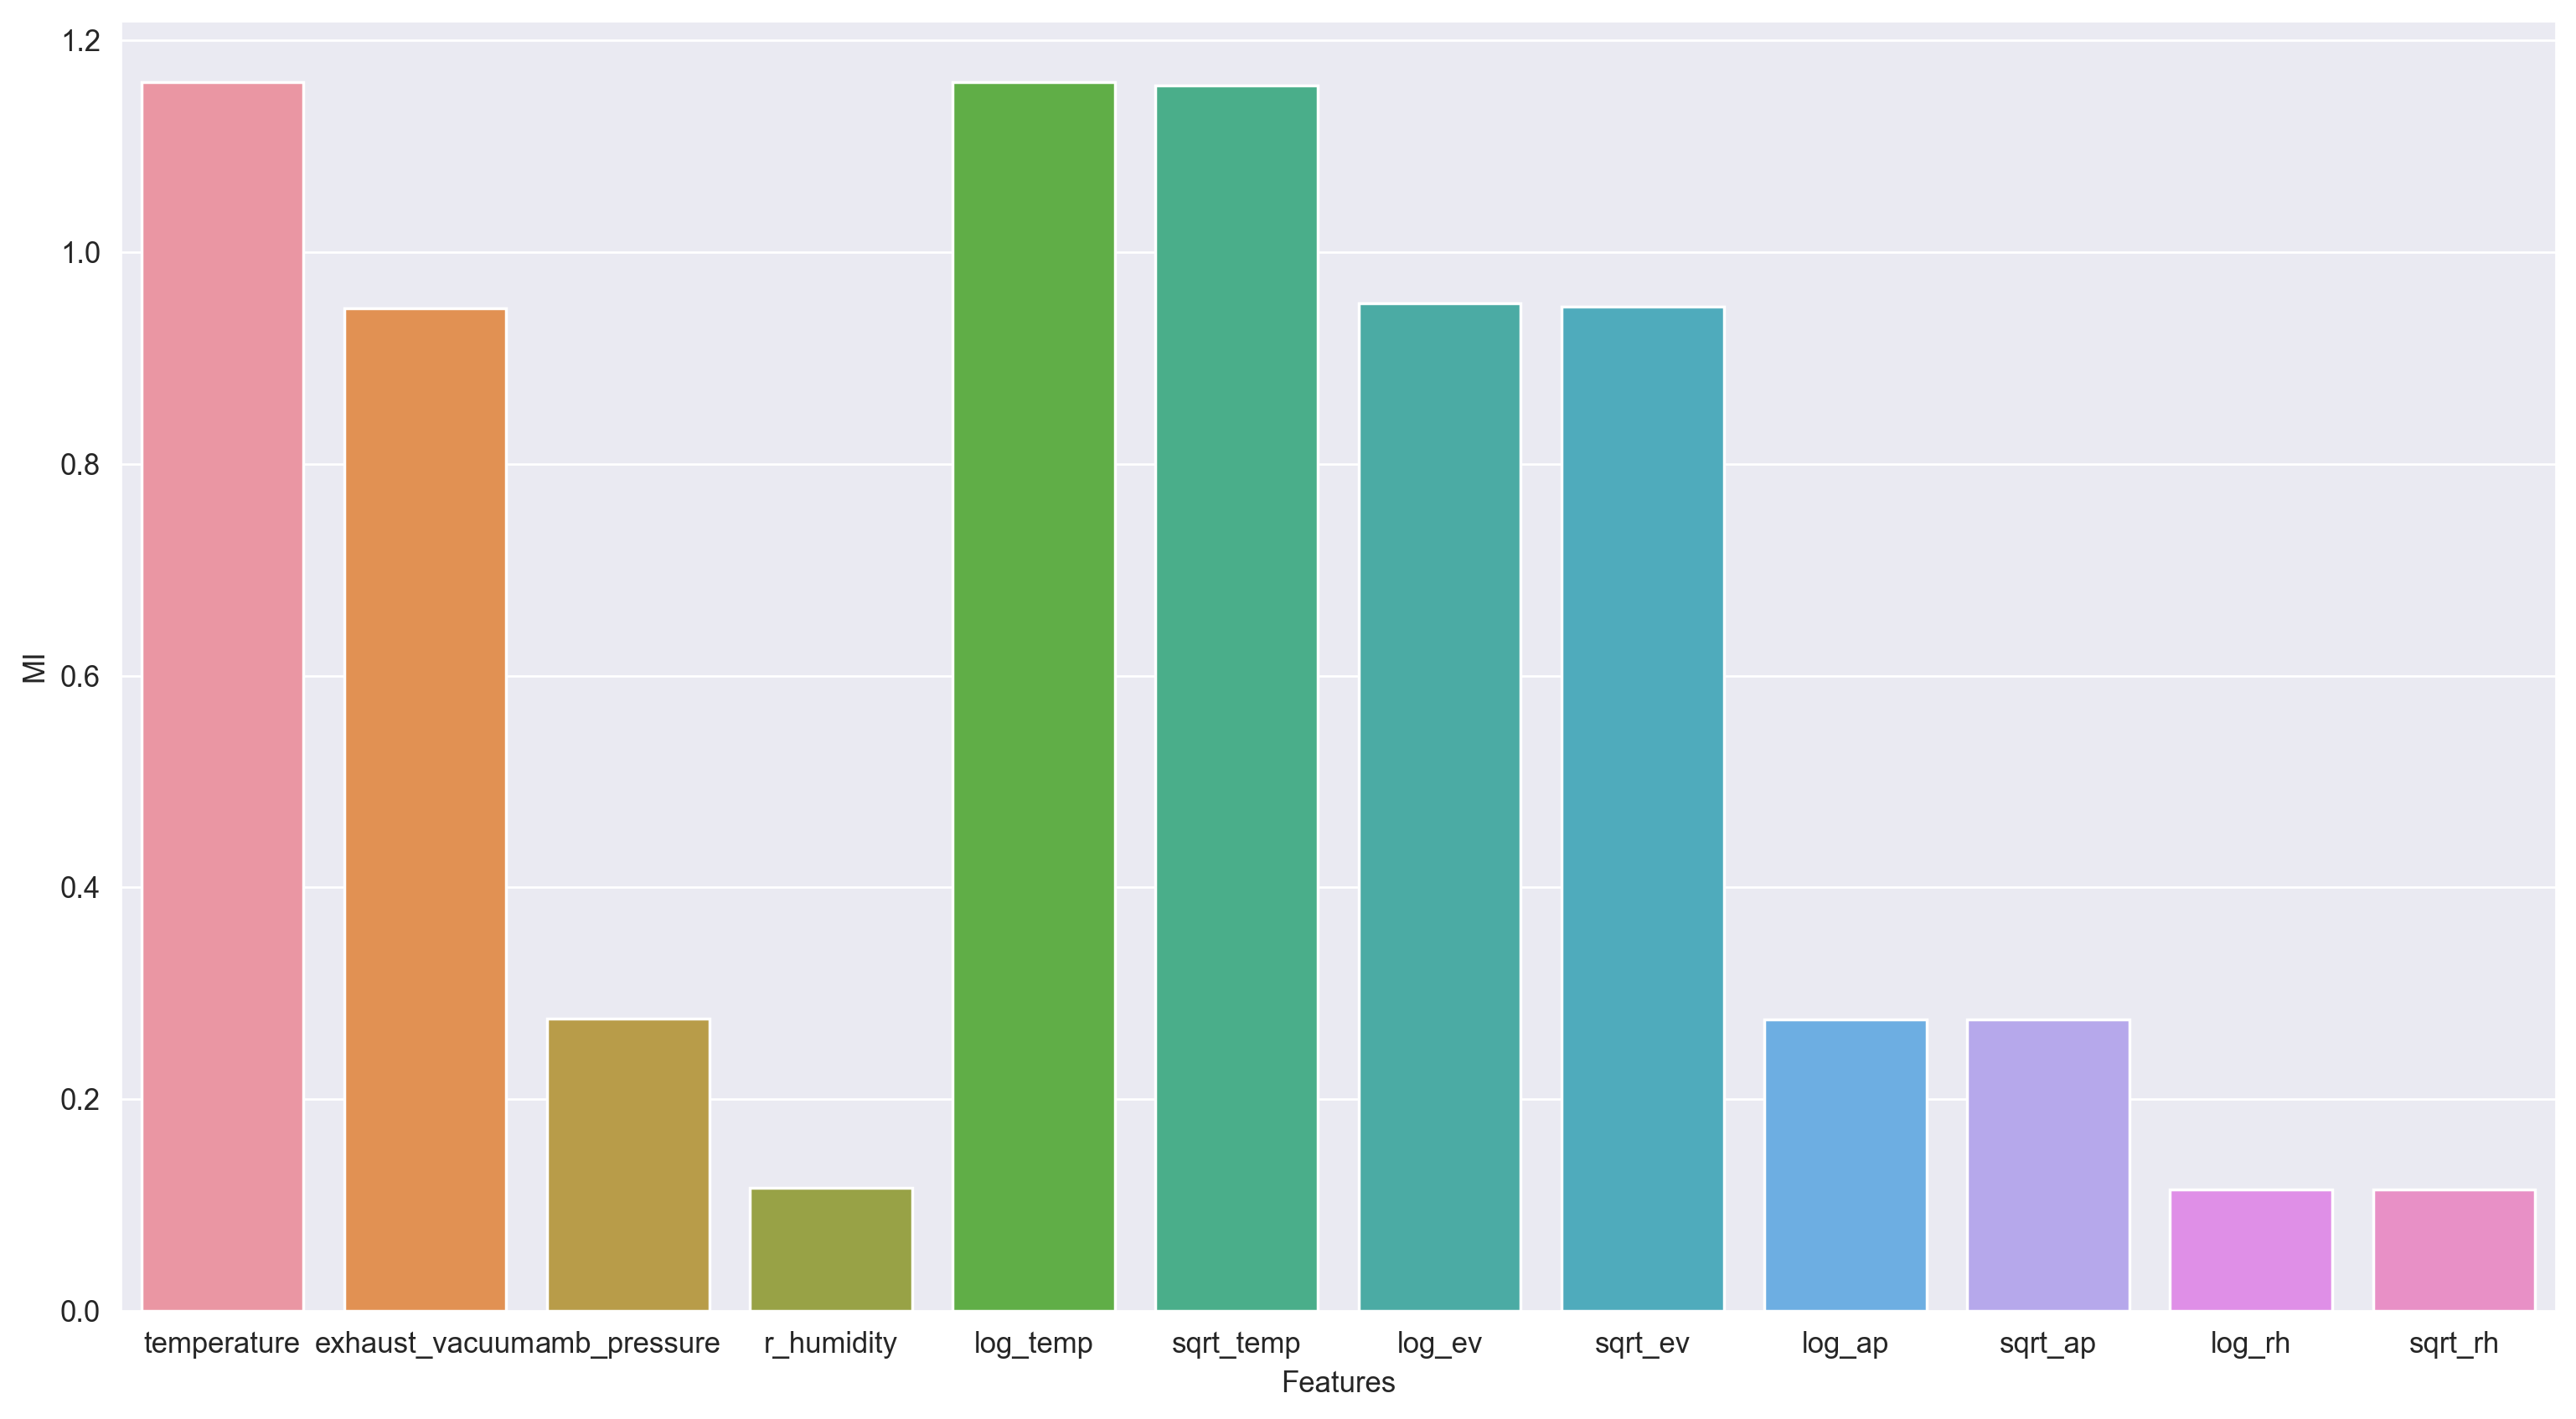

In [31]:
sns.barplot(x = 'Features',
            y = 'MI',
            data = imp_cols)

<Axes: xlabel='Features', ylabel='IG'>

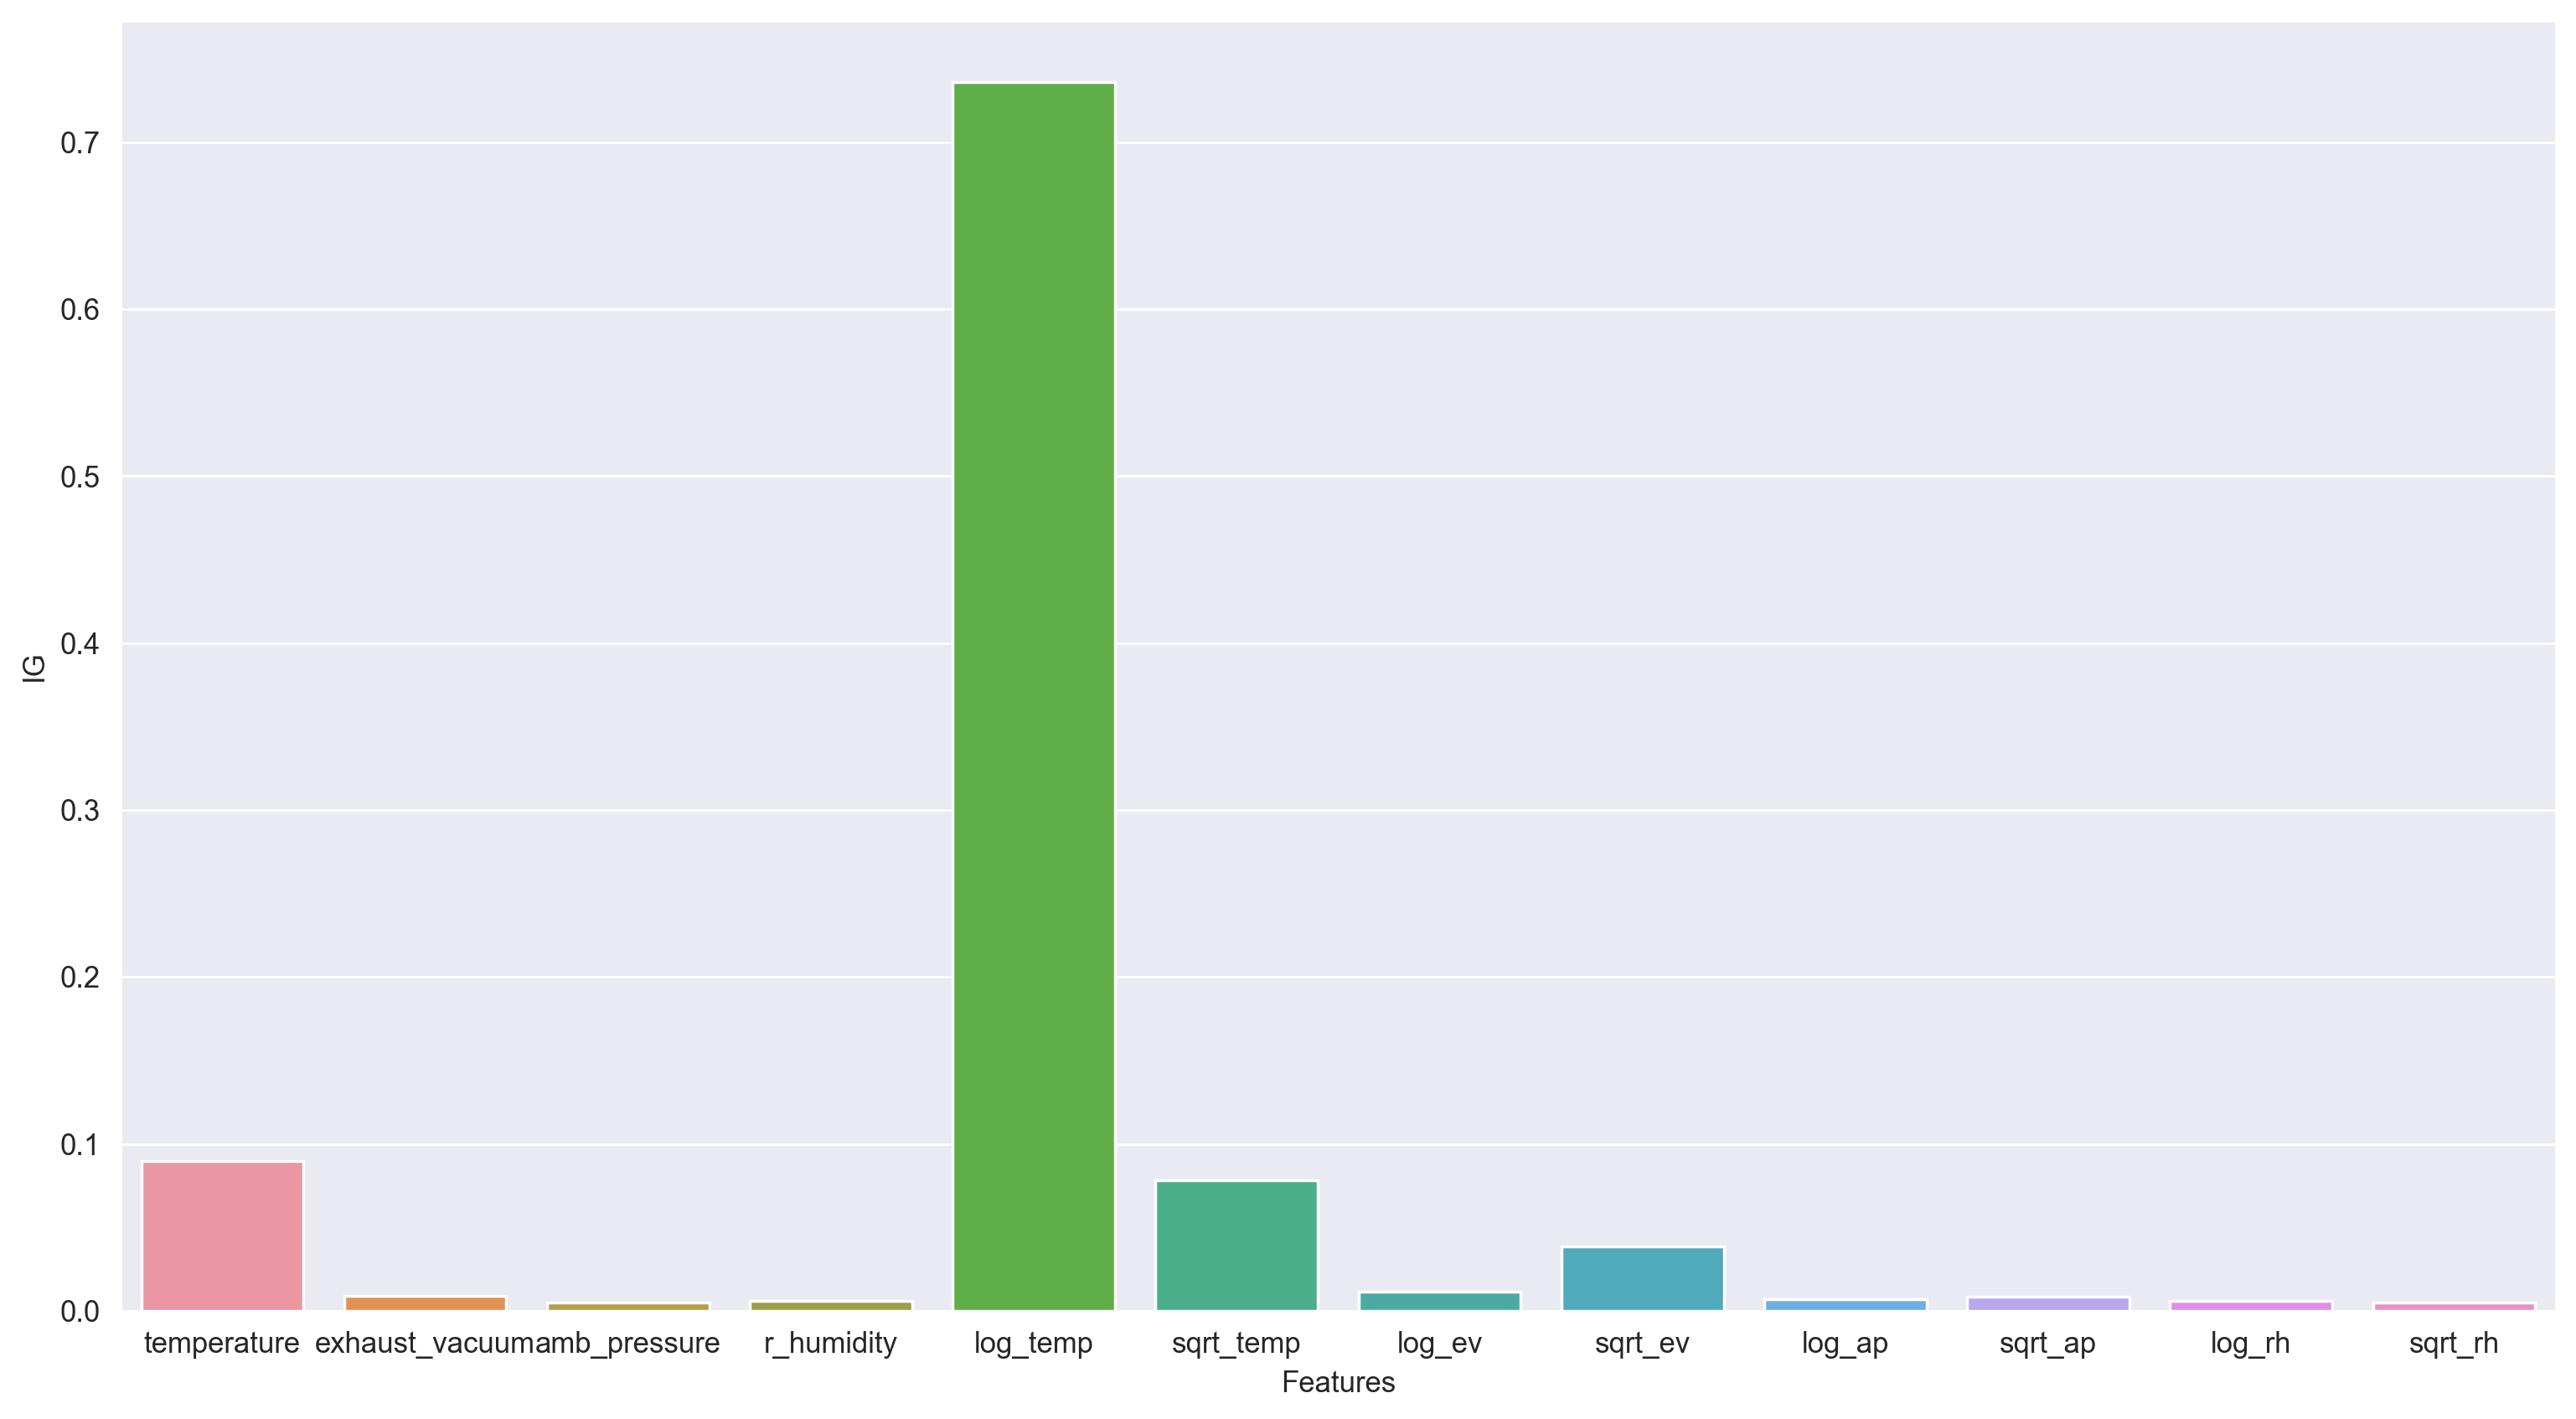

In [32]:
sns.barplot(x = 'Features',
            y = 'IG',
            data = imp_cols)

### Picking Features After Feature Engineering

#### Filtering Columns

In [51]:
x = x.iloc[:,[4,7,2,10]]

x

,log_temp,sqrt_ev,amb_pressure,log_rh
0,2.260721,6.209670,1017.01,4.096010
1,2.488234,6.506919,1019.72,4.550397
2,2.629728,6.714164,1024.42,4.402932
3,2.618855,7.368853,1017.89,4.370460
4,2.717340,7.045566,1023.78,4.317488
...,...,...,...,...
9522,2.839078,7.049113,1005.53,4.404522
9523,3.208017,8.083316,1015.42,3.966511
9524,3.415758,7.499333,1005.19,4.029628
9525,3.135494,8.127115,1020.61,4.385645


### Performing Correlation Matrex

<Axes: >

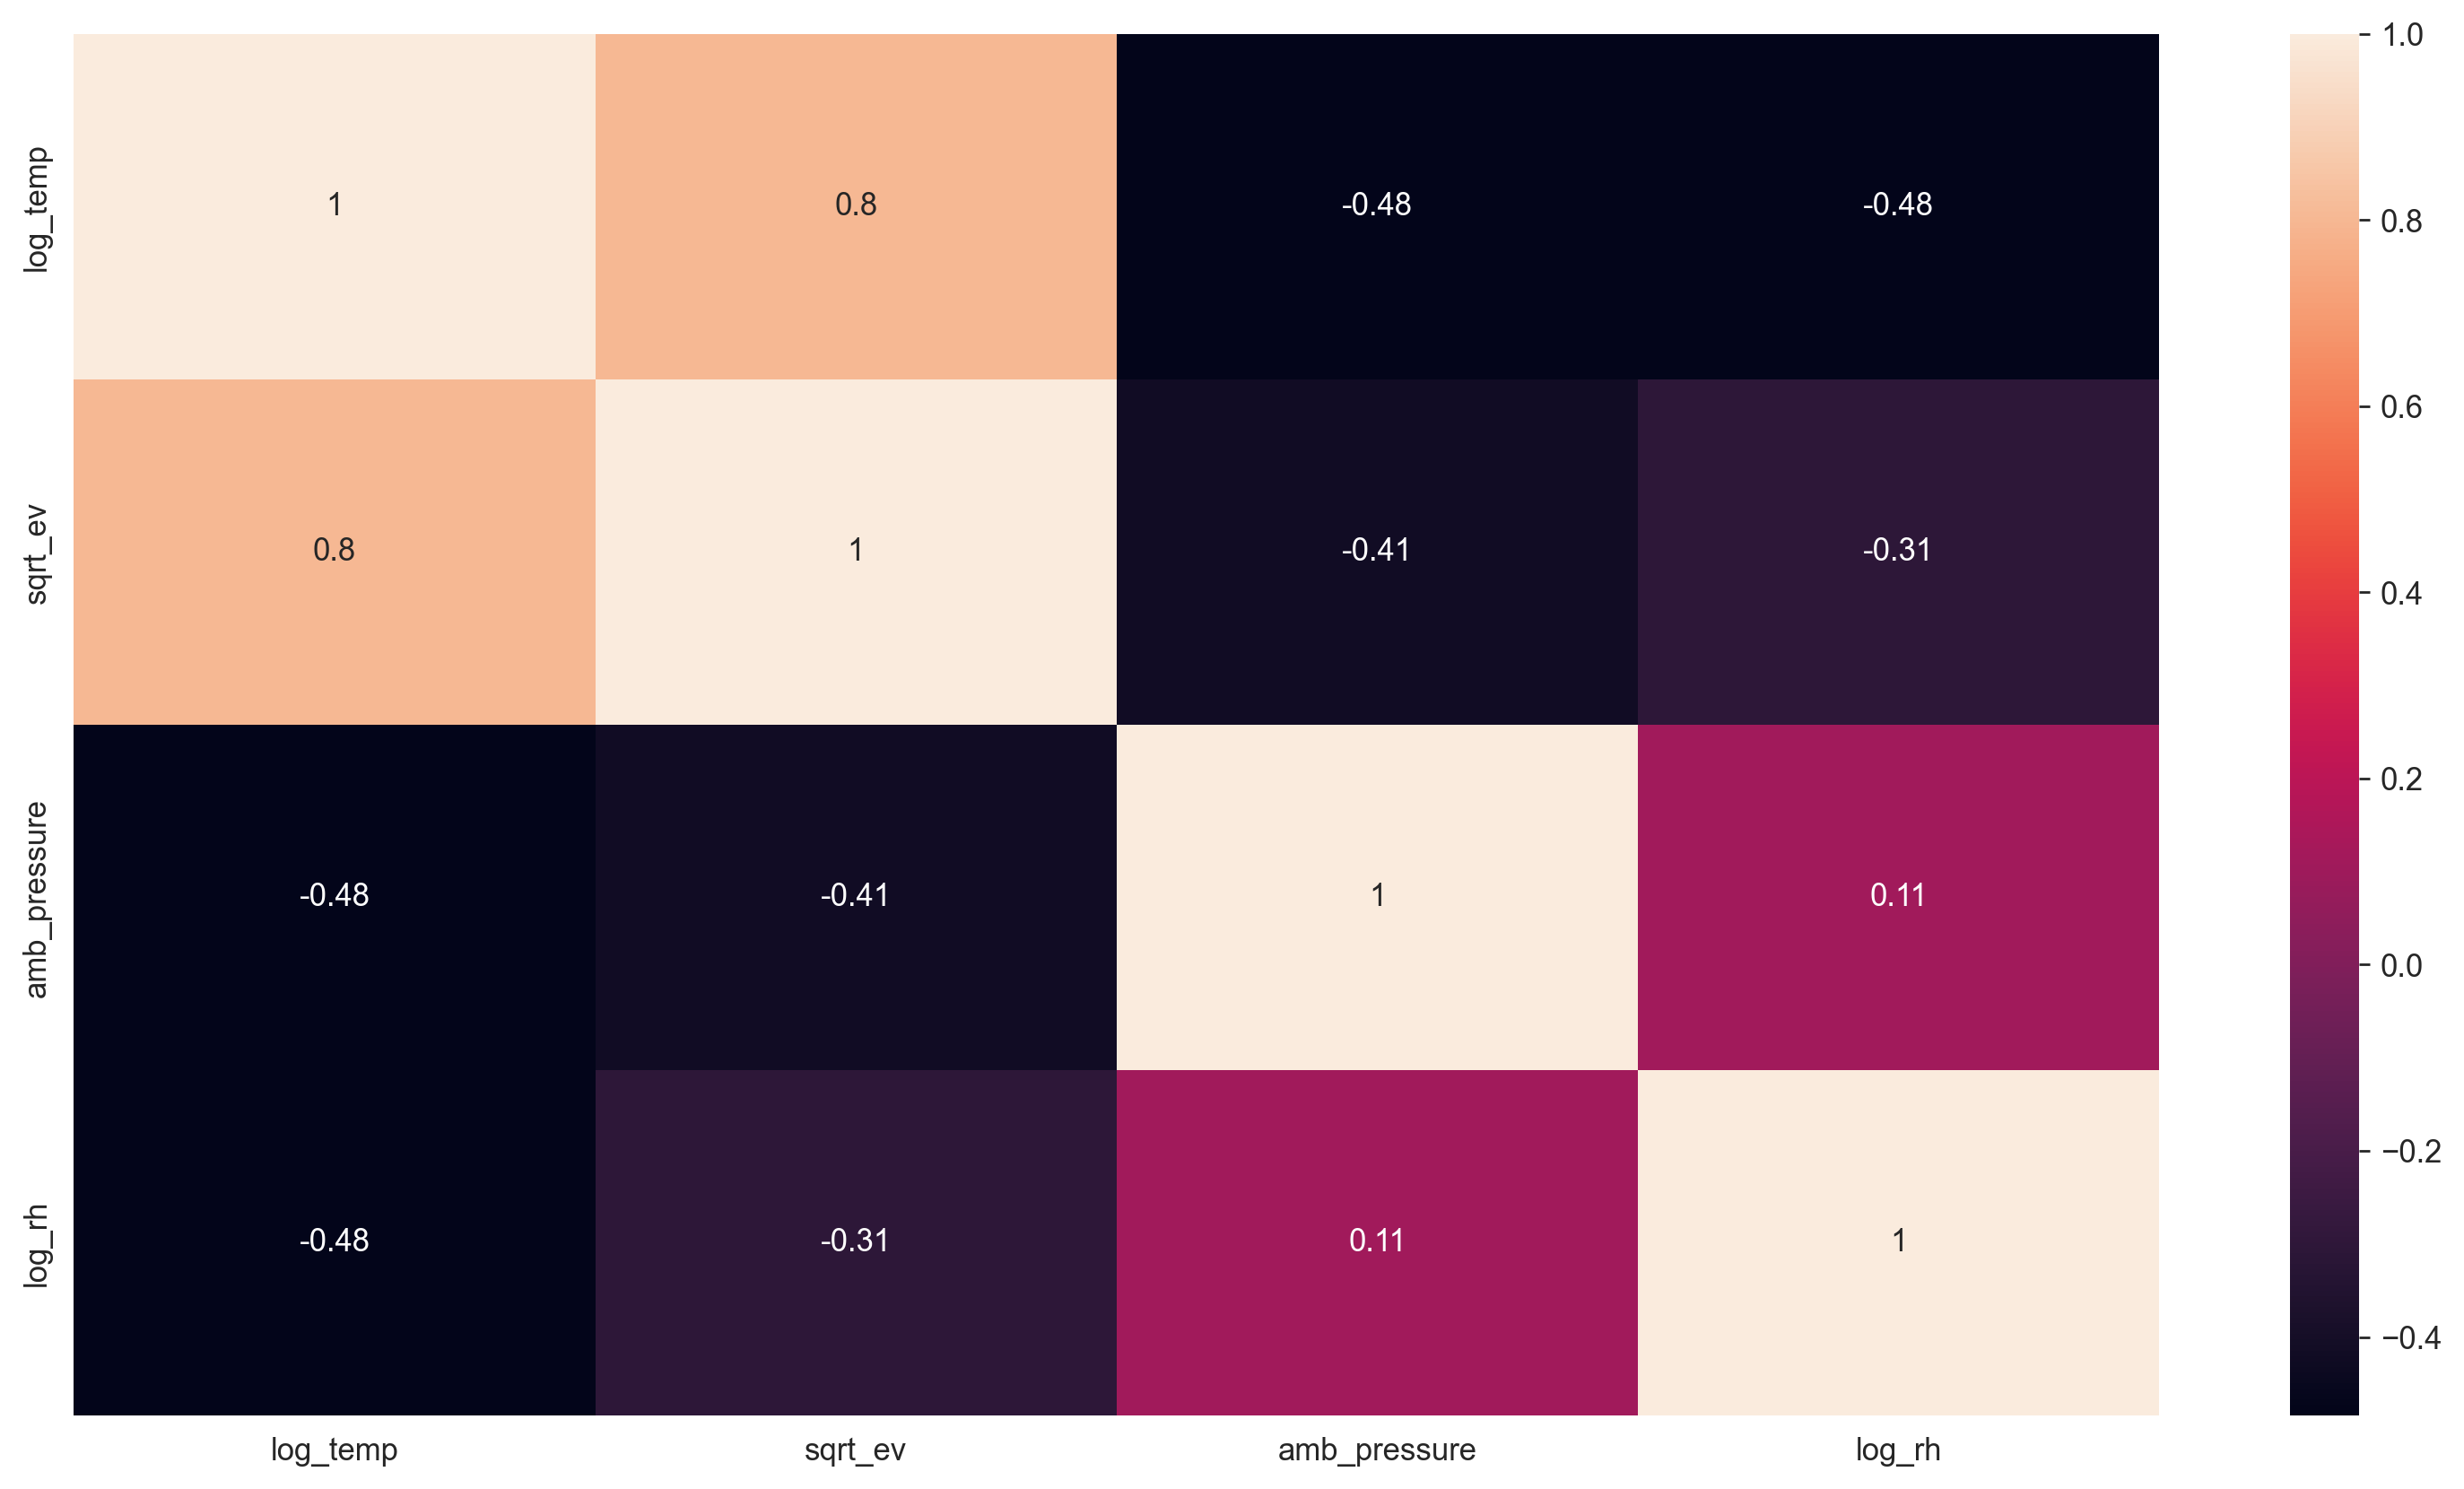

In [52]:
sns.heatmap(x.corr(), annot = True)

In [53]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(x,0.8)
len(set(corr_features))

1

In [55]:
corr_features

{'sqrt_ev'}

In [58]:
x.drop(corr_features, axis = 1, inplace = True)

x

,log_temp,amb_pressure,log_rh
0,2.260721,1017.01,4.096010
1,2.488234,1019.72,4.550397
2,2.629728,1024.42,4.402932
3,2.618855,1017.89,4.370460
4,2.717340,1023.78,4.317488
...,...,...,...
9522,2.839078,1005.53,4.404522
9523,3.208017,1015.42,3.966511
9524,3.415758,1005.19,4.029628
9525,3.135494,1020.61,4.385645


## Normalizing The Dataset

In [59]:
sc = StandardScaler()
xtrain  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [60]:
xtrain

,log_temp,amb_pressure,log_rh
0,-1.382424,0.642928,-0.809948
1,-0.881608,1.103311,1.271645
2,-0.570144,1.901760,0.596091
3,-0.594079,0.792425,0.447335
4,-0.377287,1.793035,0.204666
...,...,...,...
9522,-0.109310,-1.307326,0.603375
9523,0.702819,0.372815,-1.403194
9524,1.160109,-1.365086,-1.114049
9525,0.543177,1.254506,0.516900


## Exporting Dataframe

In [65]:
x.to_csv('x.csv', index=False)
y.to_csv('y.csv', index=False)